In [1]:
from __future__ import division #always returns approximations from divisions
import numpy as np
import matplotlib.pyplot as plt
import ephem #for astronomy calculations, converting coordinate systems
import pandas as pd
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
v_df = pd.read_csv('voy2_ephemeris_3mon.txt', skiprows = 35, skipfooter=302-251, engine='python') # df of info about voyager's position
s_df = pd.DataFrame(columns = ['source_id', 'g_abs', 'bp_rp', 'parallax', 'dist']) # df of info about stars

print(v_df)

                   date na1 na2         ra       dec  Unnamed: 5
0     1977-Aug-21 00:00           69.59450  41.46983         NaN
1     1977-Nov-21 00:00           51.99766  32.94202         NaN
2     1978-Feb-21 00:00           64.22605  25.98462         NaN
3     1978-May-21 00:00           96.68682  25.83016         NaN
4     1978-Aug-21 00:00          126.58174  21.22482         NaN
..                  ...  ..  ..        ...       ...         ...
209   2029-Nov-21 00:00          303.15263 -60.07201         NaN
210   2030-Feb-21 00:00          304.19858 -59.93119         NaN
211   2030-May-21 00:00          304.53606 -60.26137         NaN
212   2030-Aug-21 00:00          303.61388 -60.48901         NaN
213   2030-Nov-21 00:00          303.35294 -60.23244         NaN

[214 rows x 6 columns]


In [ ]:
for i in range(len(v_df.index)):
    #query to cone search around given voyager's position
    query = """SELECT source_id, phot_g_mean_mag+5*log10(ABS(parallax)/1000)+5 AS g_abs, bp_rp, parallax, abs(1000/parallax) AS dist
    FROM gaiaedr3.gaia_source
    WHERE 1=CONTAINS(
    POINT('ICRS', ra, dec),
    CIRCLE('ICRS', """ + str(v_df['ra'][i]) + """,""" + str(v_df['dec'][i]) + """, 0.035603))
    """
    
    results = Gaia.launch_job_async(query).get_results() #results from gaia query
    results = results.to_pandas().dropna() #convert to pandas

    s_df = pd.concat([s_df, results], ignore_index = True)
    
s_df = s_df.drop_duplicates(subset=['source_id']) #only keep unique rows
print(s_df)

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]


In [7]:
s_df.to_csv('voyager2_stars_3mon.csv') #save stars
s_df1 = s_df[s_df['dist'] <= 100]
s_df1.to_csv('voyager2_stars_within100.csv')
print(s_df1)

                 source_id      g_abs     bp_rp   parallax       dist
598    3615365966395574656  11.161498  2.793018  11.091076  90.162575
1020   6244081939503704704  11.062292  2.668302  13.460385  74.292079
2203   4126161238611482880  16.187882  1.547369  15.724550  63.594824
6432   4111630711451742080  16.271258  1.751467 -18.323220  54.575561
7866   4116715540366566656  15.653413  2.010803 -10.913203  91.632123
8028   4116716261979672320  15.434699  1.774878  10.665501  93.760245
8325   4116716433720175616  17.060466  2.271090  23.020162  43.440181
8391   4116716536799566592  15.515779  2.249842 -10.637175  94.009924
8440   4116716571146729216  14.597029  2.501270  11.764563  85.001034
8477   4116716571156771200  15.238981  2.263195 -10.621532  94.148381
8486   4116716571159340288  15.716208  2.465782  11.420522  87.561673
8642   4116721415879693952  14.891711  2.279375 -11.334279  88.227930
8645   4116721415879700096  14.786099  2.119253  10.147102  98.550302
8697   4116721450228

<ipython-input-12-afc3b872d5b6>:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("hot"))
  color_map.set_bad(color='white') #set color as white for masked values


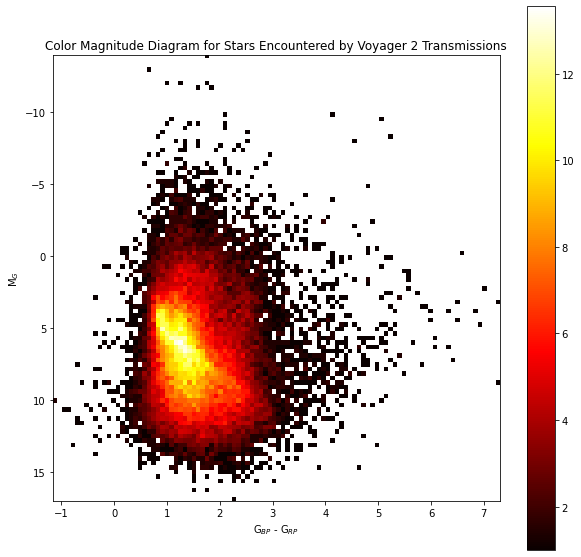

In [12]:
#build hr diagram
histogram, xedges, yedges = np.histogram2d(
   s_df['bp_rp'], s_df['g_abs'], bins=100)

histogram = np.ma.masked_where(histogram == 0.0, histogram) #map zero values
histogram = histogram.T #list bins with common y range

color_map = plt.cm.get_cmap("hot") #set colors for diagram
color_map.set_bad(color='white') #set color as white for masked values

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]] #bounding box in data

#plotting

plt.figure(figsize=(10, 10))

#plt.savefig('gaia_100_parsecs.png')
plt.imshow(np.sqrt(histogram), origin='lower', cmap=color_map,
    extent=extent, aspect=(extent[1]-extent[0])/(extent[3]-extent[2])
    )

plt.colorbar()
plt.title("Color Magnitude Diagram for Stars Encountered by Voyager 2 Transmissions")
plt.xlabel('G$_{BP}$ - G$_{RP}$')
plt.ylabel('M$_G$')
plt.gca().invert_yaxis()
plt.savefig('voyager2_stars_hr.png')

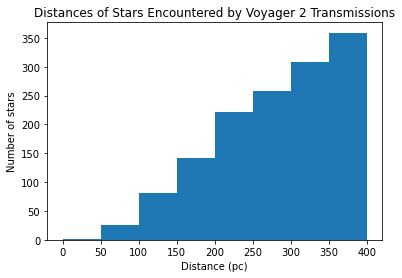

In [2]:
s_df = pd.read_csv('voyager2_stars_3mon.csv') #get csv

plt.hist(abs(1000/s_df['parallax']), bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]) #plot parallax (mas) converted to distance (pc) in histogram

plt.title("Distances of Stars Encountered by Voyager 2 Transmissions") #labels
plt.xlabel("Distance (pc)")
plt.ylabel("Number of stars")

plt.savefig("voyager2_dist_hist_3mon.png")
plt.show()